# Installing & Importing Modules & Dataset

In [2]:
!pip install unidecode contractions --quiet
!pip install emot --upgrade --quiet
!pip install tqdm --quiet
!pip install wordcloud --quiet

In [3]:
import os
import re
import json
import math
import emot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import spacy
import unidecode 
from bs4 import BeautifulSoup
import contractions
import pickle
import wordcloud

path = "/content/drive/MyDrive/DataSet/Sentiment140/sentiment140.csv"

In [4]:
df = pd.read_csv(path,encoding='latin')
df.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
df = df[['sentiment','text']]
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [5]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

In [6]:
print(df.loc[3,'text'])

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 


In [7]:
df.shape

(1599999, 2)

# EDA

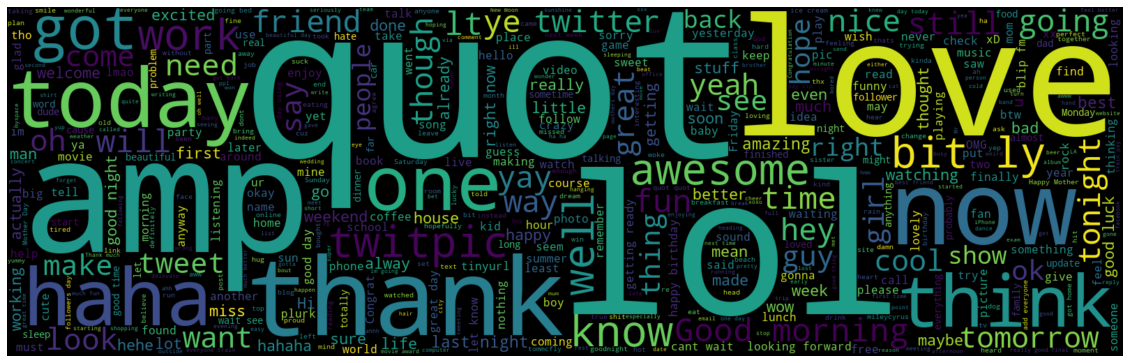

In [7]:
# Positive Sentiment
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(width=1600,height=500,max_words=500).generate(" ".join(df[df['sentiment']==4]['text']))
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')

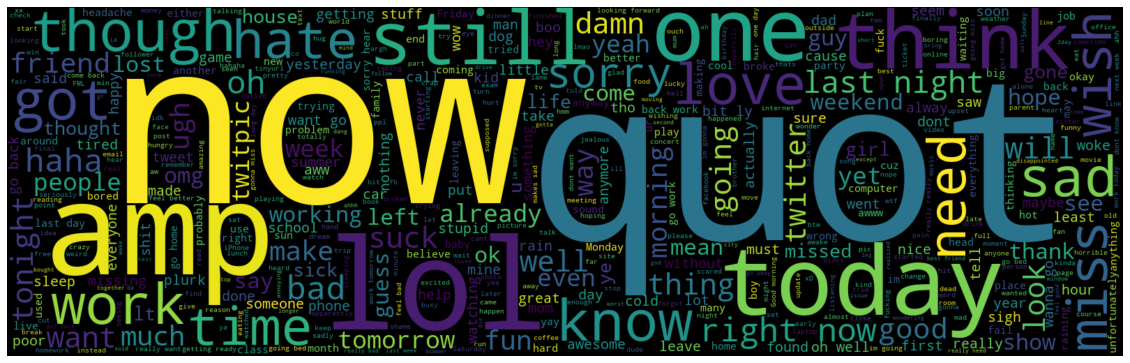

In [8]:
# Negative Sentiment
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(width=1600,height=500,max_words=500).generate(" ".join(df[df['sentiment']==0]['text']))
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')

# Preprocessing

## Handling Duplicate Values

In [9]:
# Duplicate Values
df.duplicated().sum()

16309

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(1583690, 2)

In [11]:
# Duplicate Values
df.duplicated().sum()

0

## Handling Sentiment Columns

In [12]:
df['sentiment'].unique()

array([0, 4])

In [13]:
df['sentiment'] = df['sentiment'].apply(lambda x:1 if x == 4 else 0)
df['sentiment'].unique()

array([0, 1])

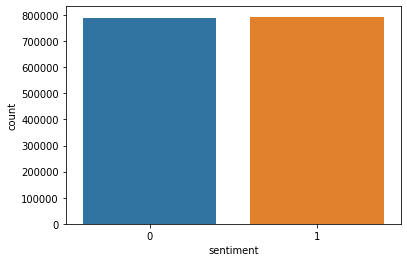

In [14]:
sns.countplot(x='sentiment',data=df)

## Splitting DataSet

In [15]:
X,y = df['text'],df['sentiment']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1266952,), (316738,), (1266952,), (316738,))

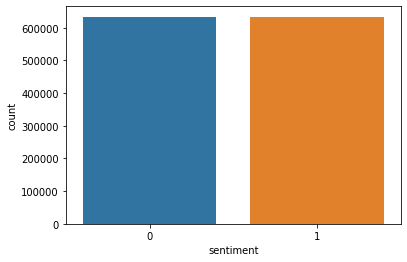

In [17]:
sns.countplot(x=y_train)

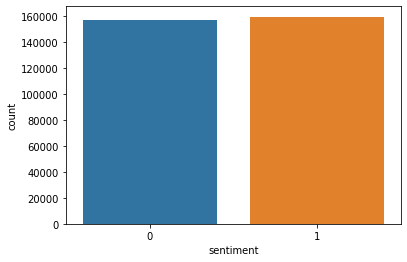

In [18]:
sns.countplot(x=y_test)

## Text Preprocessing


In [ ]:
X_train.head()

1292109     @basvandenbeld ok no worries will get it to you 
1550124    @WeTheTRAVIS can't wait to hear those new song...
213911     i listianed to ' i miss you ' by miley cyrus a...
858831     @BabyPatches and I look forward to serving you...
913405                                  Campfire and smores 
Name: text, dtype: object

### Lower Casing

In [ ]:
X_train=X_train.str.lower()

### Removing HTML Tags

In [ ]:
regex = "<.*>.*<\/.*>"
pattern = re.compile(regex)
print(re.findall(pattern,"<title>1</title>"))
print(re.findall(pattern,"123"))

['<title>1</title>']
[]


In [ ]:
def strip_html_tags(text) :
  """remove html tags from text"""
  soup = BeautifulSoup(text,"html.parser")
  stripped_text = soup.get_text(separator=" ")
  return stripped_text

In [ ]:
x = X_train[:100].apply(strip_html_tags)
y = list(x[x!=X_train[:100]].index)
for i in y :
  print("Before Removing Html Tag : " , X_train[i])
  print("After Removing Html Tag : " , x[i])
  print('')

Before Removing Html Tag :  thinks twitter could be a cure all for the egotistically insane. at least don't have to see you while you sit &amp; twit! happy twittering 
After Removing Html Tag :  thinks twitter could be a cure all for the egotistically insane. at least don't have to see you while you sit & twit! happy twittering 

Before Removing Html Tag :  enjoying a last nonfat milkshake from the custard stand, blaring music, doing wash &amp; packing, tomorrow is moving day 
After Removing Html Tag :  enjoying a last nonfat milkshake from the custard stand, blaring music, doing wash & packing, tomorrow is moving day 

Before Removing Html Tag :  atlanta airport - &quot;grove&quot; on way to gate c. delicious stuff (dried fuits, candy, caramel apple bar!). biodegradable green take out bags 
After Removing Html Tag :  atlanta airport - "grove" on way to gate c. delicious stuff (dried fuits, candy, caramel apple bar!). biodegradable green take out bags 

Before Removing Html Tag :  ahhh

In [ ]:
X_train = X_train.apply(strip_html_tags)

### Convert accented Characters to ASCII Character

In [ ]:
def accented_chars_to_ascii(text) :
  """Remove accented characters from text"""
  text = unidecode.unidecode(text)
  return text

In [ ]:
x=X_train[:200].apply(accented_chars_to_ascii)
y=list(x[x!=X_train[:200]].index)
for i in y :
  print("Before Converting to ASCII : " , X_train[i])
  print("After Converting to ASCII : " , x[i])
  print('')

Before Converting to ASCII :  â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥omggg! 9 days to lines vines and trying time comes out!!!  â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥â¥
After Converting to ASCII :  aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=omggg! 9 days to lines vines and trying time comes out!!!  aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=aY=

Before Converting to ASCII :  retweeting @ibo: fï¿½r alle mac user - 17 reasons why your mac runs slower than it should - http://tinyurl.com/cbefmj  for my mac tweeple 
After Converting to ASCII :  retweeting @ibo: fi? 1/2 r alle mac user - 17 reasons why your mac runs slower than it should - http://tinyurl.com/cbefmj  for my mac tweeple 

Befo

In [ ]:
X_train = X_train.apply(accented_chars_to_ascii)

### Handling Contractions

In [ ]:
def expand_contractions(text) :
  """expand shortend words, e.g. `don't` to `do not` """
  text = contractions.fix(text)
  return text

In [ ]:
x=X_train[:10].apply(expand_contractions)
y=list(x[x!=X_train[:10]].index)
for i in y :
  print("Before Contractions Handling : " , X_train[i])
  print("After Contractions Handling : " , x[i])
  print('')

Before Contractions Handling :  @wethetravis can't wait to hear those new songs... i'm so excited 
After Contractions Handling :  @wethetravis cannot wait to hear those new songs... I am so excited 

Before Contractions Handling :  @r_o_s_e_m_a_r_y i am so doooown! but angel and i don't have a ride! 
After Contractions Handling :  @r_o_s_e_m_a_r_y i am so doooown! but angel and i do not have a ride! 

Before Contractions Handling :  going back to richmond today...  can't i just stay here? #ilm
After Contractions Handling :  going back to richmond today...  cannot i just stay here? #ilm



In [ ]:
X_train = X_train.apply(expand_contractions)

### Removing Urls

In [ ]:
def remove_urls(text) :
  url_pattern = re.compile(r'https?:\/\/\S+|www\.\S+')
  return url_pattern.sub(r'',text)

In [ ]:
x=X_train[:200].apply(remove_urls)
y=list(x[x!=X_train[:200]].index)
for i in y :
  print("Before Contractions Handling : " , X_train[i])
  print("After Contractions Handling : " , x[i])
  print('')

Before Contractions Handling :  http://twitpic.com/7j2na - she was really sweet and she posed for me 
After Contractions Handling :   - she was really sweet and she posed for me 

Before Contractions Handling :  i just found out this photo day is going on 5 mins from me and there is a place left. guess what I am doing tomorrrow  http://tiny.cc/8llb5
After Contractions Handling :  i just found out this photo day is going on 5 mins from me and there is a place left. guess what I am doing tomorrrow  

Before Contractions Handling :  utter crap, cake exploded. suspects too much baking powder.  out of sugar and time to make a new.  http://yfrog.com/07v8dj
After Contractions Handling :  utter crap, cake exploded. suspects too much baking powder.  out of sugar and time to make a new.  

Before Contractions Handling :  @ucchie oyasumi nasai  best wishes from turkey http://turkishenglishtutor.blogspot.com/
After Contractions Handling :  @ucchie oyasumi nasai  best wishes from turkey 

Before Co

In [ ]:
X_train = X_train.apply(remove_urls)

### Removing Twitter Handles

In [ ]:
import re
def remove_twitter_handles(text) :
  pattern = re.compile(r'@[^\s]+')
  return pattern.sub(r'',text)

In [ ]:
x=X_train[:10].apply(remove_twitter_handles)
y=list(x[x!=X_train[:10]].index)
for i in y :
  print("Before Twitter Handles : " , X_train[i])
  print("After Twitter Handles : " , x[i])
  print('')

Before Twitter Handles :  @basvandenbeld ok no worries will get it to you 
After Twitter Handles :   ok no worries will get it to you 

Before Twitter Handles :  @wethetravis cannot wait to hear those new songs... I am so excited 
After Twitter Handles :   cannot wait to hear those new songs... I am so excited 

Before Twitter Handles :  @babypatches and i look forward to serving you, sweet kitty pal. 
After Twitter Handles :   and i look forward to serving you, sweet kitty pal. 

Before Twitter Handles :  @seanhanity          : o     post up a pic of asparagus! will match with a pic of my mutt diesel      
After Twitter Handles :            : o     post up a pic of asparagus! will match with a pic of my mutt diesel      

Before Twitter Handles :  @r_o_s_e_m_a_r_y i am so doooown! but angel and i do not have a ride! 
After Twitter Handles :   i am so doooown! but angel and i do not have a ride! 



In [ ]:
X_train = X_train.apply(remove_twitter_handles)

### Handling of emoticons

In [ ]:
from emot.emo_unicode import EMOTICONS_EMO 
print(EMOTICONS_EMO)

{':‑)': 'Happy face or smiley', ':-))': 'Very happy', ':-)))': 'Very very Happy face or smiley', ':)': 'Happy face or smiley', ':))': 'Very Happy face or smiley', ':)))': 'Very very Happy face or smiley', ':-]': 'Happy face or smiley', ':]': 'Happy face or smiley', ':-3': 'Happy face smiley', ':3': 'Happy face smiley', ':->': 'Happy face smiley', ':>': 'Happy face smiley', '8-)': 'Happy face smiley', ':o)': 'Happy face smiley', ':-}': 'Happy face smiley', ':}': 'Happy face smiley', ':-)': 'Happy face smiley', ':c)': 'Happy face smiley', ':^)': 'Happy face smiley', '=]': 'Happy face smiley', '=)': 'Happy face smiley', ':‑D': 'Laughing, big grin or laugh with glasses', ':D': 'Laughing, big grin or laugh with glasses', '8‑D': 'Laughing, big grin or laugh with glasses', '8D': 'Laughing, big grin or laugh with glasses', 'X‑D': 'Laughing, big grin or laugh with glasses', 'XD': 'Laughing, big grin or laugh with glasses', '=D': 'Laughing, big grin or laugh with glasses', '=3': 'Laughing, big g

In [ ]:
def convert_emoticons(text) :
  for emot in EMOTICONS_EMO:
    text = re.sub(u'('+re.escape(emot)+')', " " + "_".join(EMOTICONS_EMO[emot].replace(",","").split())+" ", text)
  return text

text = "Hello :-) :-)"
convert_emoticons(text)

'Hello  Happy_face_smiley   Happy_face_smiley '

In [ ]:
x=X_train[:100].apply(convert_emoticons)
y=list(x[x!=X_train[:100]].index)
for i in y :
  print("Before Contractions Handling : " , X_train[i])
  print("After Contractions Handling : " , x[i])
  print('')

Before Contractions Handling :   i ran out of microwavable burritos!!  idk, I am so full though. i was up at 2:30am grilling hot dogs because i was hungry. lol 
After Contractions Handling :   i ran out of microwavable burritos!!  idk, I am so full though. i was up at 2 Happy_face_smiley 0am grilling hot dogs because i was hungry. lol 



In [ ]:
X_train = X_train.apply(convert_emoticons)


### Handling Emojis

In [ ]:
from emot.emo_unicode import EMOJI_UNICODE,UNICODE_EMOJI
print(UNICODE_EMOJI)

{'🥇': ':1st_place_medal:', '🥈': ':2nd_place_medal:', '🥉': ':3rd_place_medal:', '🆎': ':AB_button_(blood_type):', '🏧': ':ATM_sign:', '🅰': ':A_button_(blood_type):', '🇦🇫': ':Afghanistan:', '🇦🇱': ':Albania:', '🇩🇿': ':Algeria:', '🇦🇸': ':American_Samoa:', '🇦🇩': ':Andorra:', '🇦🇴': ':Angola:', '🇦🇮': ':Anguilla:', '🇦🇶': ':Antarctica:', '🇦🇬': ':Antigua_&_Barbuda:', '♒': ':Aquarius:', '🇦🇷': ':Argentina:', '♈': ':Aries:', '🇦🇲': ':Armenia:', '🇦🇼': ':Aruba:', '🇦🇨': ':Ascension_Island:', '🇦🇺': ':Australia:', '🇦🇹': ':Austria:', '🇦🇿': ':Azerbaijan:', '🔙': ':BACK_arrow:', '🅱': ':B_button_(blood_type):', '🇧🇸': ':Bahamas:', '🇧🇭': ':Bahrain:', '🇧🇩': ':Bangladesh:', '🇧🇧': ':Barbados:', '🇧🇾': ':Belarus:', '🇧🇪': ':Belgium:', '🇧🇿': ':Belize:', '🇧🇯': ':Benin:', '🇧🇲': ':Bermuda:', '🇧🇹': ':Bhutan:', '🇧🇴': ':Bolivia:', '🇧🇦': ':Bosnia_&_Herzegovina:', '🇧🇼': ':Botswana:', '🇧🇻': ':Bouvet_Island:', '🇧🇷': ':Brazil:', '🇮🇴': ':British_Indian_Ocean_Territory:', '🇻🇬': ':British_Virgin_Islands:', '🇧🇳': ':Brunei:', '🇧🇬': ':B

In [ ]:
def convert_emojis(text):
  for emot in UNICODE_EMOJI :
    text = re.sub(r'('+re.escape(emot)+')',"_".join(UNICODE_EMOJI[emot].replace(',','').replace(":","").split()),text)
  return text

text = "game is on 🔥"
convert_emojis(text)

'game is on fire'

### Remove words containing & digits

In [ ]:
import re
def remove_digts(text) :
  return re.sub(r'\w*\d\w*',' ',text)

In [ ]:
x=X_train[:10].apply(remove_digts)
y=list(x[x!=X_train[:10]].index)
for i in y :
  print("Before Removing Digits : " , X_train[i])
  print("After Removing Digits : " , x[i])
  print('')

Before Removing Digits :  i listianed to ' i miss you ' by miley cyrus and started crying ... i miss you grandma ..we all wish you could see matty's 18th birthday 
After Removing Digits :  i listianed to ' i miss you ' by miley cyrus and started crying ... i miss you grandma ..we all wish you could see matty's   birthday 



In [ ]:
X_train = X_train.apply(remove_digts)


### Removing Punctuations

In [ ]:
import re
import string
def remove_punctuations(text) :
  return text.translate(str.maketrans('','',string.punctuation))
text = "Hello :-) :-)"
remove_punctuations(text)

'Hello  '

In [ ]:
x=X_train[:5].apply(remove_punctuations)
y=list(x[x!=X_train[:5]].index)
for i in y :
  print("Before Removing Punctuations : " , X_train[i])
  print("After Removing Punctuations : " , x[i])
  print('')

Before Removing Punctuations :   cannot wait to hear those new songs... I am so excited 
After Removing Punctuations :   cannot wait to hear those new songs I am so excited 

Before Removing Punctuations :  i listianed to ' i miss you ' by miley cyrus and started crying ... i miss you grandma ..we all wish you could see matty's   birthday 
After Removing Punctuations :  i listianed to  i miss you  by miley cyrus and started crying  i miss you grandma we all wish you could see mattys   birthday 

Before Removing Punctuations :   and i look forward to serving you, sweet kitty pal. 
After Removing Punctuations :   and i look forward to serving you sweet kitty pal 



In [ ]:
X_train = X_train.apply(remove_punctuations)


### Removing Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])

In [ ]:
x=X_train[:5].apply(remove_stopwords)
y=list(x[x!=X_train[:5]].index)
for i in y :
  print("Before Removing Stopwords : " , X_train[i])
  print("After Removing Stopwords : " , x[i])
  print('')

Before Removing Stopwords :   ok no worries will get it to you 
After Removing Stopwords :  ok worries get

Before Removing Stopwords :   cannot wait to hear those new songs I am so excited 
After Removing Stopwords :  cannot wait hear new songs I excited

Before Removing Stopwords :  i listianed to  i miss you  by miley cyrus and started crying  i miss you grandma we all wish you could see mattys   birthday 
After Removing Stopwords :  listianed miss miley cyrus started crying miss grandma wish could see mattys birthday

Before Removing Stopwords :   and i look forward to serving you sweet kitty pal 
After Removing Stopwords :  look forward serving sweet kitty pal

Before Removing Stopwords :  campfire and smores 
After Removing Stopwords :  campfire smores



In [ ]:
X_train = X_train.apply(remove_stopwords)


In [ ]:
X_train.to_csv('file1.csv')

### Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_words(text) :
  return " ".join([stemmer.stem(word) for word in text.split()])

In [ ]:
x=X_train[:10].apply(stem_words)
y=list(x[x!=X_train[:10]].index)
for i in y :
  print("Before Stemming words : " , X_train[i])
  print("After Stemming words : " , x[i])
  print('')

Before Stemming words :  ok worries get
After Stemming words :  ok worri get

Before Stemming words :  cannot wait hear new songs I excited
After Stemming words :  cannot wait hear new song I excit

Before Stemming words :  listianed miss miley cyrus started crying miss grandma wish could see mattys birthday
After Stemming words :  listian miss miley cyru start cri miss grandma wish could see matti birthday

Before Stemming words :  look forward serving sweet kitty pal
After Stemming words :  look forward serv sweet kitti pal

Before Stemming words :  campfire smores
After Stemming words :  campfir smore

Before Stemming words :  sleeept finally getting ready leave feel bad sleeping set alarm
After Stemming words :  sleeept final get readi leav feel bad sleep set alarm

Before Stemming words :  post pic asparagus match pic mutt diesel
After Stemming words :  post pic asparagu match pic mutt diesel

Before Stemming words :  going back richmond today cannot stay ilm
After Stemming words 

In [ ]:
X_train = X_train.apply(stem_words)


In [ ]:
X_train.head()

1292109                                         ok worri get
1550124                    cannot wait hear new song I excit
213911     listian miss miley cyru start cri miss grandma...
858831                     look forward serv sweet kitti pal
913405                                         campfir smore
Name: text, dtype: object

### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

def lemmatize_words(text) :
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
x=X_train[:10].apply(lemmatize_words)
y=list(x[x!=X_train[:10]].index)
for i in y :
  print("Before Lemmatization words : " , X_train[i])
  print("After Lemmatization words : " , x[i])
  print('')

Before Lemmatization words :  @basvandenbeld ok no worries will get it to you 
After Lemmatization words :  @basvandenbeld ok no worry will get it to you

Before Lemmatization words :  @WeTheTRAVIS can't wait to hear those new songs... i'm so excited 
After Lemmatization words :  @WeTheTRAVIS can't wait to hear those new songs... i'm so excited

Before Lemmatization words :  i listianed to ' i miss you ' by miley cyrus and started crying ... i miss you grandma ..we all wish you could see Matty's 18th birthday 
After Lemmatization words :  i listianed to ' i miss you ' by miley cyrus and started cry ... i miss you grandma ..we all wish you could see Matty's 18th birthday

Before Lemmatization words :  @BabyPatches and I look forward to serving you, sweet kitty pal. 
After Lemmatization words :  @BabyPatches and I look forward to serving you, sweet kitty pal.

Before Lemmatization words :  Campfire and smores 
After Lemmatization words :  Campfire and smores

Before Lemmatization words :

In [ ]:
X_train = X_train.apply(lemmatize_words)


In [ ]:
X_train.head()

1292109                                         ok worri get
1550124                    cannot wait hear new song I excit
213911     listian miss miley cyru start cri miss grandma...
858831                     look forward serv sweet kitti pal
913405                                         campfir smore
Name: text, dtype: object

### Saving Processed Training Dataset

In [ ]:
X_train.to_csv('X_train_processed.csv')

In [ ]:
X_test.to_csv('X_test_processed.csv')

In [ ]:
y_train.to_csv('y_train_processed.csv')

In [ ]:
y_test.to_csv('y_test_processed.csv')

## All Preprocessing Steps

In [8]:
import os
import re
import json
import string
import math
import emot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import spacy
import unidecode 
from bs4 import BeautifulSoup
import contractions
from emot.emo_unicode import EMOTICONS_EMO 
from emot.emo_unicode import EMOJI_UNICODE,UNICODE_EMOJI
nltk.download('stopwords')
nltk.download('wordnet')


def lower_case(text) :
  return text.lower()

def strip_html_tags(text) :
  """remove html tags from text"""
  soup = BeautifulSoup(text,"html.parser")
  stripped_text = soup.get_text(separator=" ")
  return stripped_text
 
 
def accented_chars_to_ascii(text) :
  """Remove accented characters from text"""
  text = unidecode.unidecode(text)
  return text
  
  
def expand_contractions(text) :
  """expand shortend words, e.g. `don't` to `do not` """
  text = contractions.fix(text)
  return text
  
  
def remove_urls(text) :
  url_pattern = re.compile(r'https?:\/\/\S+|www\.\S+')
  return url_pattern.sub(r'',text)
  
  
def remove_twitter_handles(text) :
  pattern = re.compile(r'@[^\s]+')
  return pattern.sub(r'',text)
  
  
def convert_emoticons(text) :
  for emot in EMOTICONS_EMO:
    text = re.sub(u'('+re.escape(emot)+')', " " + "_".join(EMOTICONS_EMO[emot].replace(",","").split())+" ", text)
  return text
  
  
def convert_emojis(text):
  for emot in UNICODE_EMOJI :
    text = re.sub(r'('+re.escape(emot)+')',"_".join(UNICODE_EMOJI[emot].replace(',','').replace(":","").split()),text)
  return text
  
  
def remove_digts(text) :
  return re.sub(r'\w*\d\w*',' ',text)
  
  
def remove_punctuations(text) :
  return text.translate(str.maketrans('','',string.punctuation))


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])  
  
  
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_words(text) :
  return " ".join([stemmer.stem(word) for word in text.split()]) 

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text) :
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Feature Extraction


## Bag of Word Feature

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(min_df=5)
# bow = bow_vect.fit_transform(X_train['text'])
# type(bow)

## TF-IDF Feature

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5)
# cor = tfidf.fit_transform(X_train['text'])
# type(cor)

# Modeling

## Models

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

lr_model = LogisticRegression()

### NaiveBayes Classifier

#### MultinomialNB

In [12]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score,accuracy_score

mnb_model = MultinomialNB()

#### BernoulliNB

In [13]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import f1_score,accuracy_score

bnb_model = BernoulliNB()

### SVM Classifier

#### SVC

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score

svc_model = SVC()

### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()

### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier 

rfc_model = RandomForestClassifier()

### Ensemble Learning

In [38]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
gbc_model = GradientBoostingClassifier(verbose=True,learning_rate=1.25,n_estimators=300,max_depth=12)
abc_model = AdaBoostClassifier(learning_rate=0.5)
xgb_model = XGBClassifier(verbosity=2)

### Training Models

In [18]:
def training_model(model,x_train,y_train) :
  model.fit(x_train,y_train)
  return model

## Testing the Model

In [19]:
def testing_model(model,vectorizer,y_train) :
  pred = model.predict(vectorizer)
  f1 = f1_score(y_train,pred)
  acc = accuracy_score(y_train,pred)
  print(f"F1 Score : {f1}")
  print(f"Acc. : {acc}")

# Experimenting 

In [20]:
path = "/content/drive/MyDrive/DataSet/Sentiment140/sentiment140.csv"
df = pd.read_csv(path,encoding='latin')
df.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
df = df[['sentiment','text']]
df.drop_duplicates(inplace=True)
df['sentiment'] = df['sentiment'].apply(lambda x:1 if x == 4 else 0)
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [21]:
X,y = df['text'],df['sentiment']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
def cleaning_pipeline(x) :
  x=x.fillna("")
  x = x.apply(lower_case)
  x = x.apply(strip_html_tags)
  x = x.apply(accented_chars_to_ascii)
  x = x.apply(remove_urls)
  x = x.apply(remove_twitter_handles)
  # x = x.apply(convert_emoticons)
  # x = x.apply(convert_emojis)
  x = x.apply(remove_digts)
  x = x.apply(remove_punctuations)
  x = x.apply(remove_stopwords)
  x = x.apply(expand_contractions)
  # x = x.apply(stem_words)
  x = x.apply(lemmatize_words)
  return x

In [23]:
def training_pipeline(x,y,model,vectorizer) :
  vect = vectorizer.fit_transform(x)
  model = training_model(model,vect,y)
  testing_model(model,vect,y)

In [24]:
def testing_pipeline(x,y,model,vectorizer) :
  pow = vectorizer.transform(x)
  testing_model(model,pow,y)
  # return pow

In [25]:
def predicting_pipeline(x,model,vectorizer) :
  pow = vectorizer.transform(x)
  pred = model.predict_proba(pow)
  pred1 = model.predict(pow)
  pred2 = model.predict_log_proba(pow)
  return [pred,pred1,pred2]

In [26]:
X_train,X_test = cleaning_pipeline(X_train),cleaning_pipeline(X_test)

In [27]:
# Models -> lr_model,bnb_model,mnb_model
# Feature Extraction -> bow, tfidf
training_pipeline(X_train,y_train,bnb_model,bow)

F1 Score : 0.7824629457812508
Acc. : 0.7790381956064634


In [28]:
testing_pipeline(X_test,y_test,bnb_model,bow)

F1 Score : 0.7745571459486197
Acc. : 0.7697655475503413


In [ ]:
models = [lr_model,bnb_model,mnb_model]
model_names = ['Logistic_Regression','Bernoulli_NB','MultinomialNB']
vectorizers = [bow,tfidf]
vectorizer_names = ['bag_of_words','tfidf']

for v in range(len(vectorizers)) :
  for m in range(len(models) ):
    print("============================================")
    print(f"Model : {models[m]} with {vectorizers[v]}")
    print("Training Accuracy : ")
    training_pipeline(X_train,y_train,models[m],vectorizers[v])
    print("Testing Accuracy : ")
    testing_pipeline(X_test,y_test,models[m],vectorizers[v])
    pickle.dump(models[m], open(f'{model_names[m]}_{vectorizer_names[v]}.pkl','wb'))
  print("=============================================")

Model : LogisticRegression() with CountVectorizer(min_df=5)
Training Accuracy : 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


F1 Score : 0.7954181674204326
Acc. : 0.78955950975254
Testing Accuracy : 
F1 Score : 0.7869629195440196
Acc. : 0.7796854182321035
Model : BernoulliNB() with CountVectorizer(min_df=5)
Training Accuracy : 
F1 Score : 0.7824629457812508
Acc. : 0.7790381956064634
Testing Accuracy : 
F1 Score : 0.7745571459486197
Acc. : 0.7697655475503413
Model : MultinomialNB() with CountVectorizer(min_df=5)
Training Accuracy : 
F1 Score : 0.7789047804947298
Acc. : 0.7787280023236871
Testing Accuracy : 
F1 Score : 0.7707476629646604
Acc. : 0.7694245717280528
Model : LogisticRegression() with TfidfVectorizer(min_df=5)
Training Accuracy : 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


F1 Score : 0.7948235217710989
Acc. : 0.790542183129274
Testing Accuracy : 
F1 Score : 0.7868867582211452
Acc. : 0.7811945519640838
Model : BernoulliNB() with TfidfVectorizer(min_df=5)
Training Accuracy : 
F1 Score : 0.7824629457812508
Acc. : 0.7790381956064634
Testing Accuracy : 
F1 Score : 0.7745571459486197
Acc. : 0.7697655475503413
Model : MultinomialNB() with TfidfVectorizer(min_df=5)
Training Accuracy : 
F1 Score : 0.7767165340133831
Acc. : 0.7761612121059046
Testing Accuracy : 
F1 Score : 0.7656471782595481
Acc. : 0.7638647715146273


In [32]:
# training_pipeline(X_train,y_train,xgb_model,bow)

KeyboardInterrupt: ignored

In [31]:
# testing_pipeline(X_test,y_test,xgb_model,bow)

F1 Score : 0.732210725783008
Acc. : 0.6858981240015407


In [ ]:
training_pipeline(X_train,y_train,gbc_model,bow)

In [ ]:
testing_pipeline(X_test,y_test,gbc_model,bow)

In [39]:
training_pipeline(X_train,y_train,gbc_model,tfidf)

      Iter       Train Loss   Remaining Time 
         1           1.2438          271.62m
         2           1.1881          267.45m
         3           1.1589          256.90m
         4           1.1369          254.93m
         5           1.1177          253.79m
         6           1.1028          247.16m
         7           1.0899          243.09m
         8           1.0769          240.99m
         9           1.0670          237.76m
        10           1.0580          233.36m
        20           0.9951          197.34m
        30           0.9622          174.40m
        40           0.9387          158.49m
        50           0.9207          145.53m
        60           0.9043          137.07m
        70           0.8915          128.38m
        80           0.8807          120.13m
        90           0.8703          112.78m
       100           0.8606          105.79m
       200           0.7991           48.64m
       300           0.7679            0.00s
F1 Score 

In [40]:
testing_pipeline(X_test,y_test,gbc_model,tfidf)

F1 Score : 0.7761286579507188
Acc. : 0.7697497616326427


In [41]:
pickle.dump(gbc_model, open(f'GBC_Classifier_tfidf_l.pkl','wb'))

In [ ]:
models = [gbc_model,abc_model]
model_names = ['GradientBoost_Classifier','AdaBoost_Classifier']
vectorizers = [bow,tfidf]
vectorizer_names = ['bag_of_words','tfidf']

for v in range(len(vectorizers)) :
  for m in range(len(models) ):
    print("============================================")
    print(f"Model : {models[m]} with {vectorizers[v]}")
    print("Training Accuracy : ")
    training_pipeline(X_train,y_train,models[m],vectorizers[v])
    print("Testing Accuracy : ")
    testing_pipeline(X_test,y_test,models[m],vectorizers[v])
    pickle.dump(models[m], open(f'{model_names[m]}_{vectorizer_names[v]}.pkl','wb'))
  print("=============================================")

Model : GradientBoostingClassifier(verbose=True) with CountVectorizer(min_df=5)
Training Accuracy : 
      Iter       Train Loss   Remaining Time 
         1           1.3776            7.27m
         2           1.3702            7.07m
         3           1.3641            6.88m
         4           1.3585            6.91m
         5           1.3538            6.87m
         6           1.3491            6.72m
         7           1.3450            6.63m
         8           1.3412            6.57m
         9           1.3356            6.48m
        10           1.3323            6.38m
        20           1.3021            5.58m
        30           1.2815            4.76m
        40           1.2643            3.81m
        50           1.2503            3.04m
        60           1.2385            2.36m
        70           1.2287            1.73m
        80           1.2202            1.13m
        90           1.2125           33.61s
       100           1.2057            0.00

KeyboardInterrupt: ignored

In [ ]:
# models = [rfc_model,dtc_model,svc_model]
# model_names = ['Random_ Forest_Classifier','Decision_Tree_Classifier','Support_Vecter_Classifier']
# vectorizers = [bow,tfidf]
# vectorizer_names = ['bag_of_words','tfidf']

# for v in range(len(vectorizers)) :
#   for m in range(len(models) ):
#     print("============================================")
#     print(f"Model : {models[m]} with {vectorizers[v]}")
#     print("Training Accuracy : ")
#     training_pipeline(X_train,y_train,models[m],vectorizers[v])
#     print("Testing Accuracy : ")
#     testing_pipeline(X_test,y_test,models[m],vectorizers[v])
#     pickle.dump(models[m], open(f'{model_names[m]}_{vectorizer_names[v]}.pkl','wb'))
#   print("=============================================")

Model : RandomForestClassifier() with CountVectorizer()
Training Accuracy : 


In [ ]:
from google.colab import files
files.download('/content/Bernoulli_NB_bag_of_words.pkl') 
files.download('/content/Bernoulli_NB_tfidf.pkl') 
files.download('/content/Logistic_Regression_bag_of_words.pkl') 
files.download('/content/Logistic_Regression_tfidf.pkl') 
files.download('/content/MultinomialNB_bag_of_words.pkl') 
files.download('/content/MultinomialNB_tfidf.pkl') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
from google.colab import files
files.download('/content/GBC_Classifier_tfidf.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model=pickle.load(open('/content/Bernoulli_NB_tfidf.pkl','rb'))

BernoulliNB()

In [ ]:
predicting_pipeline(X_train[:10],model,bow)

[array([[0.41351933, 0.58648067],
        [0.10028105, 0.89971895],
        [0.97860681, 0.02139319],
        [0.08847385, 0.91152615],
        [0.14880221, 0.85119779],
        [0.99129276, 0.00870724],
        [0.70498319, 0.29501681],
        [0.10639498, 0.89360502],
        [0.4255475 , 0.5744525 ],
        [0.92512037, 0.07487963]]),
 array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0]),
 array([[-0.88305101, -0.53361557],
        [-2.29977855, -0.10567284],
        [-0.02162535, -3.84468243],
        [-2.42504828, -0.09263499],
        [-1.9051373 , -0.16111076],
        [-0.00874537, -4.74360059],
        [-0.34958131, -1.22072296],
        [-2.2405969 , -0.11249141],
        [-0.85437872, -0.55433786],
        [-0.07783142, -2.5918734 ]])]

In [ ]:
X_train[:10]

1292109     @basvandenbeld ok no worries will get it to you 
1550124    @WeTheTRAVIS can't wait to hear those new song...
213911     i listianed to ' i miss you ' by miley cyrus a...
858831     @BabyPatches and I look forward to serving you...
913405                                  Campfire and smores 
611650     Sleeept in, finally getting ready to leave. Fe...
298377     Damn!!!!! Why did I have to have a good heart....
1080408    @seanhanity          : O     post up a pic of ...
458327     @R_o_s_e_m_a_r_y I AM SO DOOOOWN! but angel an...
738664     Going back to Richmond today...  can't I just ...
Name: text, dtype: object